# Home Credit EDA

## Author : Neil Samuel Pulukuri
## unid : u1448225

## Table of Contents

1. <a href="#1.-Introduction">Introduction</a>
2. <a href="#2.-Data-Description">Data Description</a>
3. <a href="#3.-Exploring-the-Target-variable">Exploring the Target variable</a>
4. <a href="#4.-Dealing-with-Missing-Values">Dealing with Missing Values</a>
5. <a href="#5.-Dealing-with-Multi-Collinearity">Dealing with Multi Collinearity</a>
6. <a href="#6.-Imputing-Data">Imputing Data</a>
7. <a href="#7.-EDA">EDA</a>
8. <a href="#8.-Converting-Categorical-to-Numerical-variables">Converting Categorical to Numerical variables</a>
9. <a href="#9.-Joining-Dataset-Bureau">Joining Dataset Bureau</a>
10. <a href="#10.-Result">Result</a>
11. <a href="#11.-Next-Steps">Next Steps</a>



## 1. Introduction

Home Credit aims to expand its financial services by offering loans to individuals without established credit histories, thus safeguarding them from unscrupulous lenders. To achieve this, Home Credit utilizes telco and transactional data to assess their clients' repayment capabilities. While Home Credit is using various statistical methods to make their prediction they believe that more accurate information can be fetched from the data.To attain greater accuracy and unlock the full potential of their model, the initial step involves conducting exploratory data analysis (EDA). EDA allows for valuable insights to be drawn from the data, enabling the identification and removal of unnecessary information. This process sets the stage for the application of a machine learning model, which will aid Home Credit in reducing loan defaults through accurate predictions. Insights obtained from EDA include factors influencing loan default, providing essential information for improving lending decisions.

## 2. Data Description

The dataset provided for the project is a real world dataset provided by home credit. It contains application train and application test data. Along with the train and test data there are also other datasets that supplements the train dataset which helps in building a machine learning model which will accurately predict the loan default.

In [97]:
# importing the libraries required for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

### Application Train/Test dataset

In [98]:
# Path
train_path = "C:\\Users\\Neil\\Desktop\\utah_classes\\fall_semester\\Carrer Capstone\\data\\home-credit-default-risk\\application_train.csv"
test_path = "C:\\Users\\Neil\\Desktop\\utah_classes\\fall_semester\\Carrer Capstone\\data\\home-credit-default-risk\\application_test.csv"

In [99]:
# Reading Application train/Test
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

In [100]:
# Printing the 5 rows of Application train dataset
train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [101]:
# Printing the dimensions of Application train dataset
train_data.shape

(307511, 122)

In [102]:
# Getting statistical desciption since this is the dataset we will be using for prediction
train_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [103]:
test_data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

#### The application train dataset is the primary dataset we will use to build the machine learning model. This dataset contains all the essential information about the clients' loan repayment capability.

In [104]:
test_data.shape

(48744, 121)

### Credit Card Balance

In [725]:
# path
credit_path = "C:\\Users\\Neil\\Desktop\\utah_classes\\fall_semester\\Carrer Capstone\\data\\home-credit-default-risk\\credit_card_balance.csv"

In [726]:
# reading the credit_card_balance dataset
credit_data = pd.read_csv(credit_path)

In [727]:
# printing the credit card balance dataset
credit_data.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


#### Monthly balance snapshots of previous credit cards that the applicant has with Home Credit is mentioned in the dataset.

### Previous Application dataset

In [728]:
# path
previous_path = "C:\\Users\\Neil\\Desktop\\utah_classes\\fall_semester\\Carrer Capstone\\data\\home-credit-default-risk\\previous_application.csv"

In [729]:
# reading the previous application dataset
previous_data = pd.read_csv(previous_path)

In [730]:
# printing the previous application dataset
previous_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [731]:
previous_data.shape

(1670214, 37)

#### All previous applications for Home Credit loans of clients who have loans in our sample are mentioned in this dataset.

### Installment Payment dataset

In [732]:
# path
installment_path = "C:\\Users\\Neil\\Desktop\\utah_classes\\fall_semester\\Carrer Capstone\\data\\home-credit-default-risk\\installments_payments.csv"

In [733]:
# reading the installement payment dataset
installment_data = pd.read_csv(installment_path)

In [734]:
# printing the first five rows of installment payment dataset
installment_data.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [735]:
# printing the shape of installement payment dataset
installment_data.shape

(13605401, 8)

#### This data set contains repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.

## 3. Exploring the Target variable

In [105]:
# Counting the unique values of target variable
train_data['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

[Text(0.5, 1.0, 'Distribution of the Target Variable')]

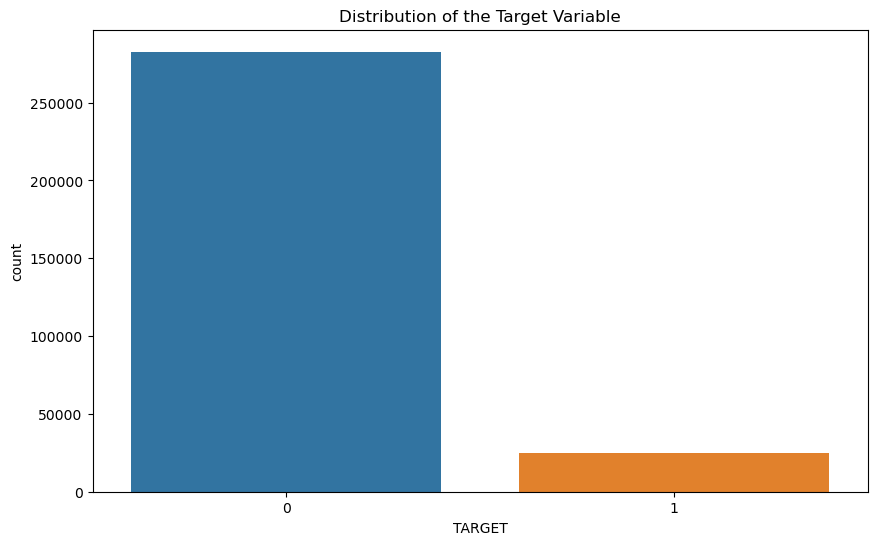

In [106]:
# Plotting the above desciption
plt.figure(figsize=(10, 6))
sns.countplot(x = train_data['TARGET'], data = train_data).set(title='Distribution of the Target Variable')

####  The data is imbalanced with respect to the target variable. Most of the loans are repaid.

In [107]:
# Calculate the accuracy for a majority class classifier using mean
accuracy_majority_class = (train_data['TARGET'] == 0).mean()

# Print the results
print(f"Accuracy for Majority Class: {accuracy_majority_class:.2f}")

Accuracy for Majority Class: 0.92


## 4. Dealing with Missing Values

In [108]:
# Function to calculate the missing data which gives percentage
def missing_data(data):
    missing_percentage = data.isna().mean()*100
    return pd.DataFrame(data = {'col_name' : data.columns.values, 'missing_percentage' : missing_percentage})

In [109]:
# Top 20 missing values
missing_data_result = missing_data(train_data)
top_missing = missing_data_result.sort_values(by='missing_percentage', ascending=False).reset_index(drop=True).head(10)
top_missing

,col_name,missing_percentage
0,COMMONAREA_MEDI,69.872297
1,COMMONAREA_AVG,69.872297
2,COMMONAREA_MODE,69.872297
3,NONLIVINGAPARTMENTS_MODE,69.432963
4,NONLIVINGAPARTMENTS_AVG,69.432963
5,NONLIVINGAPARTMENTS_MEDI,69.432963
6,FONDKAPREMONT_MODE,68.386172
7,LIVINGAPARTMENTS_MODE,68.354953
8,LIVINGAPARTMENTS_AVG,68.354953
9,LIVINGAPARTMENTS_MEDI,68.354953


In [110]:
# Test_data
missing_data_test_result = missing_data(test_data)
top_missing_test = missing_data_test_result.sort_values(by='missing_percentage', ascending=False).reset_index(drop=True).head(10)
top_missing_test

,col_name,missing_percentage
0,COMMONAREA_AVG,68.716150
1,COMMONAREA_MODE,68.716150
2,COMMONAREA_MEDI,68.716150
3,NONLIVINGAPARTMENTS_AVG,68.412523
4,NONLIVINGAPARTMENTS_MODE,68.412523
5,NONLIVINGAPARTMENTS_MEDI,68.412523
6,FONDKAPREMONT_MODE,67.284179
7,LIVINGAPARTMENTS_AVG,67.249302
8,LIVINGAPARTMENTS_MODE,67.249302
9,LIVINGAPARTMENTS_MEDI,67.249302


In [111]:
# Calculating correlation before removing columns which have more than 40 % percentage missing values
correlations = train_data.corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(5))
print('Most Negative Correlations:\n', correlations.head(5))

Most Positive Correlations:
 DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64
Most Negative Correlations:
 EXT_SOURCE_3    -0.178919
EXT_SOURCE_2    -0.160472
EXT_SOURCE_1    -0.155317
DAYS_EMPLOYED   -0.044932
FLOORSMAX_AVG   -0.044003
Name: TARGET, dtype: float64


#### Removing Columns with more than 40% missing values ,but EXT_SOURCE_1 has higher correlation with target so not removing EXT_SOURCE_1 

In [112]:
missing_columns_40 = missing_data(train_data)

In [113]:
# Finding columns which has more than 40 % missing value percentage except EXT_SOURCE_1 which has a strong negative correlation
if 'EXT_SOURCE_1' in missing_columns_40['col_name'].values:
    missing_columns_40_list = missing_columns_40['col_name'][missing_columns_40['col_name'] != 'EXT_SOURCE_1'][missing_columns_40['missing_percentage'] > 40]
else:
    missing_columns_40_list = missing_columns_40['col_name'][missing_columns_40['missing_percentage'] > 40]

In [114]:
# Total columns with more than 40 % missing values
print(f"No of columns with greater than 40% missing values: {len(missing_columns_40_list)}")

No of columns with greater than 40% missing values: 48


In [115]:
# Droping those 41 columns
train_data.drop(missing_columns_40_list,axis = 1, inplace = True)

In [116]:
# checking the train_data dimensions
train_data.shape

(307511, 74)

In [117]:
# Same steps for test_dataset
missing_columns_test_40 = missing_data(test_data)

In [118]:
# Finding columns which has more than 40 % missing value percentage except EXT_SOURCE_1 which has a strong negative correlation
if 'EXT_SOURCE_1' in missing_columns_test_40['col_name'].values:
    missing_columns_40_test_list = missing_columns_test_40['col_name'][missing_columns_test_40['col_name'] != 'EXT_SOURCE_1'][missing_columns_test_40['missing_percentage'] > 40]
else:
    missing_columns_40_test_list = missing_columns_test_40['col_name'][missing_columns_test_40['missing_percentage'] > 40]

In [119]:
# Total columns with more than 40 % missing values
print(f"No of columns with greater than 40% missing values: {len(missing_columns_40_test_list)}")

No of columns with greater than 40% missing values: 48


In [120]:
# Droping those 41 columns
test_data.drop(missing_columns_40_test_list,axis = 1, inplace = True)

In [121]:
# checking the test_dat dimensions
test_data.shape

(48744, 73)

In [122]:
# Flag document just flags the data whether customer submitted document or not so better to remove 

flag_documents = ['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14',
'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']

In [123]:
# removing those flag columns
train_data.drop(columns=flag_documents, inplace=True)

In [124]:
# checking the train_data dimensions
train_data.shape

(307511, 54)

In [125]:
# removing those flag columns in test_data
test_data.drop(columns=flag_documents, inplace=True)

In [126]:
# checking the train_data dimensions
test_data.shape

(48744, 53)

In [127]:
train_data['SK_ID_CURR']

0         100002
1         100003
2         100004
3         100006
4         100007
           ...  
307506    456251
307507    456252
307508    456253
307509    456254
307510    456255
Name: SK_ID_CURR, Length: 307511, dtype: int64

## 5. Dealing with Multi Collinearity

In [128]:
# Calculating correlation between numerical variables
correlation_matrix = train_data.corr()
highly_correlated = set()

# Find variables with correlation > 0.7
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            highly_correlated.add(colname)
highly_correlated

{'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'CNT_FAM_MEMBERS',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'FLAG_EMP_PHONE',
 'LIVE_CITY_NOT_WORK_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'REGION_RATING_CLIENT_W_CITY'}

In [129]:
# Before we remove those columns with multi collinearity lets calculate those columns correlation with target variables
correlation_columns = ['AMT_ANNUITY',
                       'AMT_GOODS_PRICE',
                       'CNT_FAM_MEMBERS',
                       'DEF_60_CNT_SOCIAL_CIRCLE',
                       'FLAG_EMP_PHONE',
                       'LIVE_CITY_NOT_WORK_CITY',
                       'LIVE_REGION_NOT_WORK_REGION',
                       'OBS_60_CNT_SOCIAL_CIRCLE',
                       'REGION_RATING_CLIENT_W_CITY']

correlations_1 = train_data[correlation_columns + ['TARGET']].corr()['TARGET']
correlations_1

AMT_ANNUITY                   -0.012817
AMT_GOODS_PRICE               -0.039645
CNT_FAM_MEMBERS                0.009308
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
FLAG_EMP_PHONE                 0.045982
LIVE_CITY_NOT_WORK_CITY        0.032518
LIVE_REGION_NOT_WORK_REGION    0.002819
OBS_60_CNT_SOCIAL_CIRCLE       0.009022
REGION_RATING_CLIENT_W_CITY    0.060893
TARGET                         1.000000
Name: TARGET, dtype: float64

In [130]:
# Finding columns with correlation less than 0.04
remove_columns_less_corr = correlations_1[correlations_1 < 0.04].index
print(remove_columns_less_corr)

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY',
       'LIVE_REGION_NOT_WORK_REGION', 'OBS_60_CNT_SOCIAL_CIRCLE'],
      dtype='object')


In [131]:
# Drop those columns
train_data.drop(columns=remove_columns_less_corr, inplace=True)

In [132]:
# Calculating the train data shape
train_data.shape

(307511, 47)

In [133]:
# Since the test dataset has no target variables we used the remove_columns_less_corr
test_data.drop(columns=remove_columns_less_corr, inplace=True)

In [134]:
# Calculating the test data shape
test_data.shape

(48744, 46)

## 6. Dealing with Outliers

In [135]:
train_data.describe(include="all")
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05
DAYS_REGISTRATION,307511.0,-4986.120328,3522.886321,-2.467200e+04,-7479.500000,-4504.000000,-2010.000000,0.000000e+00
DAYS_ID_PUBLISH,307511.0,-2994.202373,1509.450419,-7.197000e+03,-4299.000000,-3254.000000,-1720.000000,0.000000e+00


In [136]:
train_data['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

C:\Users\Neil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


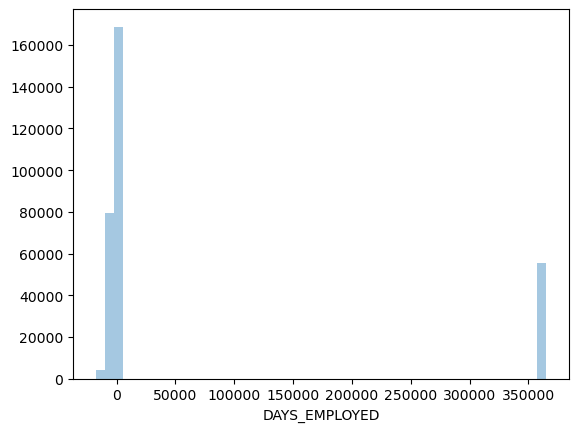

In [137]:
sns.distplot(train_data['DAYS_EMPLOYED'], kde=False);
plt.show()

In [138]:
# Instead of removing outliers lets create a new boolean column stating whether or not the value is an outlier or not
train_data['DAYS_EMPLOYED_OUTLIER'] = train_data["DAYS_EMPLOYED"] == 365243


In [139]:
# Replacing outlier in Days Employed with nan
train_data['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

In [140]:
# Same steps for test_data
test_data['DAYS_EMPLOYED_OUTLIER'] = test_data["DAYS_EMPLOYED"] == 365243
test_data['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

In [141]:
train_data['SK_ID_CURR']

0         100002
1         100003
2         100004
3         100006
4         100007
           ...  
307506    456251
307507    456252
307508    456253
307509    456254
307510    456255
Name: SK_ID_CURR, Length: 307511, dtype: int64

## 7. Imputing Data

In [142]:
# Distribution of data types in training data
train_data.dtypes.value_counts()

int64      18
float64    17
object     12
bool        1
dtype: int64

In [143]:
# Finding out object datatype
train_data.select_dtypes('object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [144]:
# Fill missing values in 'object_columns' with the first mode value
for column in train_data.columns:
    if train_data[column].dtype == 'object':
        train_data[column].fillna(train_data[column].mode()[0], inplace=True)

In [145]:
# Just checking whether all the object datatype columns have no null values
train_data.select_dtypes('object').isna().sum()

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
dtype: int64

In [146]:
# Fill missing values in 'float_columns' with their median values
for column in train_data.columns:
    if train_data[column].dtype == 'float':
        train_data[column].fillna(train_data[column].median(), inplace=True)

In [147]:
# Verifying whether dataset has no null values
train_data.isna().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

In [148]:
# Using the function to cross check whether data is cleaned or not
missing_data(train_data).sort_values(by='missing_percentage', ascending=False).reset_index(drop=True).head(5)

,col_name,missing_percentage
0,SK_ID_CURR,0.0
1,TARGET,0.0
2,REGION_RATING_CLIENT,0.0
3,REGION_RATING_CLIENT_W_CITY,0.0
4,WEEKDAY_APPR_PROCESS_START,0.0


In [149]:
train_data.dtypes.value_counts()

int64      18
float64    17
object     12
bool        1
dtype: int64

In [150]:
pd.set_option('display.max_columns', None)
train_data.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_OUTLIER
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307511,307511,307511,307511,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511,307511.000000,307511.000000,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,7,8,5,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,NaN,TUESDAY,NaN,NaN,NaN,NaN,NaN,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,249818,158774,218391,196432,272868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151577,NaN,NaN,53901,NaN,NaN,NaN,NaN,NaN,67992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252137
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,NaN,NaN,NaN,NaN,NaN,0.020868,-16036.995067,-2251.606131,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,NaN,2.052463,2.031521,NaN,12.063419,0.015144,0.050769,0.078173,0.230454,NaN,0.504311,5.145034e-01,0.515695,1.417523,0.142944,-962.858119,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463,NaN
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,NaN,NaN,NaN,NaN,NaN,0.013831,4363.988632,2136.193492,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,NaN,0.509034,0.502737,NaN,3.265832,0.122126,0.219526,0.268444,0.421124,NaN,0.139408,1.908699e-01,0.174736,2.398395,0.446033,826.807226,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523,NaN
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,NaN,NaN,NaN,NaN,NaN,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.014568,8.173617e-08,0.000527,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,189145.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,NaN,NaN,NaN,NaN,NaN,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,2.000000,2.000000,NaN,10.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.505998,3.929737e-01,0.417100,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
50%,278202.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,NaN,NaN,NaN,NaN,NaN,0.018850,-15750.000000,-1648.000000,-4504.000000,-3254.000000,1.000000,1.000000,0.00000

In [151]:
# Same steps for test Data
train_data.select_dtypes('object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [152]:
# Fill missing values in 'object_columns' with the first mode value
for column in test_data.columns:
    if test_data[column].dtype == 'object':
        test_data[column].fillna(test_data[column].mode()[0], inplace=True)

In [153]:
# Just checking whether all the object datatype columns have no null values
test_data.select_dtypes('object').isna().sum()

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
dtype: int64

In [154]:
# Fill missing values in 'float_columns' with their median values
for column in test_data.columns:
    if test_data[column].dtype == 'float':
        test_data[column].fillna(test_data[column].median(), inplace=True)

In [155]:
# Verifying whether dataset has no null values
test_data.isna().sum()

SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION

## 7. EDA

[Text(0.5, 1.0, 'Distribution of the Loans')]

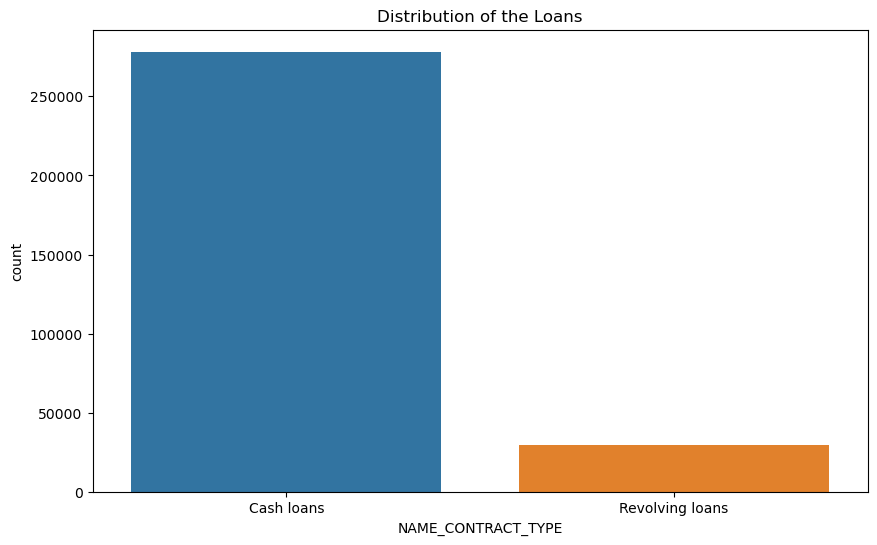

In [157]:
# Count Plot to find the distribution of various loans
plt.figure(figsize=(10, 6))
sns.countplot(x = train_data['NAME_CONTRACT_TYPE'], data = train_data).set(title='Distribution of the Loans')

#### From the above countplot it can be noted that CashLoans are dominant to revolving loans

### Which Gender has more clients

[Text(0.5, 1.0, 'Distribution of Gender')]

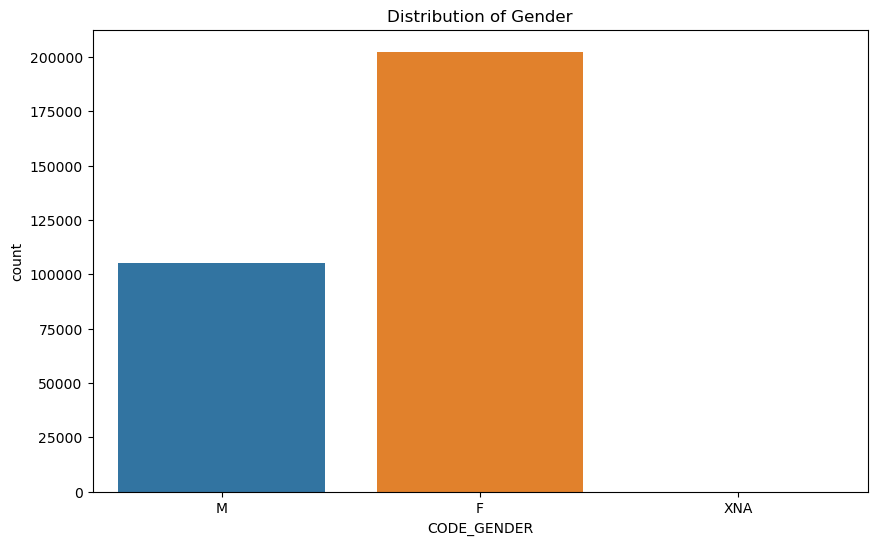

In [158]:
# Plotting a countplot for knowing the count of gender
plt.figure(figsize=(10, 6))
sns.countplot(x='CODE_GENDER',data=train_data).set(title='Distribution of Gender')

#### We have more female population who are clients

### Which Gender are more likely to default

[Text(0.5, 1.0, 'Distribution of Gender')]

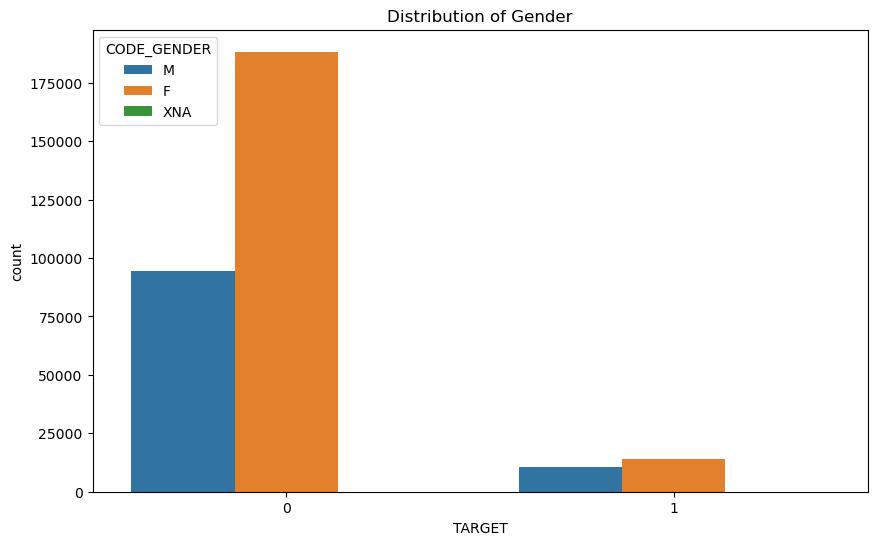

In [159]:
# Using a countplot with hue to determine which gender is most likely to default
plt.figure(figsize=(10, 6))
sns.countplot(x='TARGET',hue ='CODE_GENDER', data=train_data).set(title='Distribution of Gender')

#### Females are more likely to default.

### Top 5 Occupation types as clients

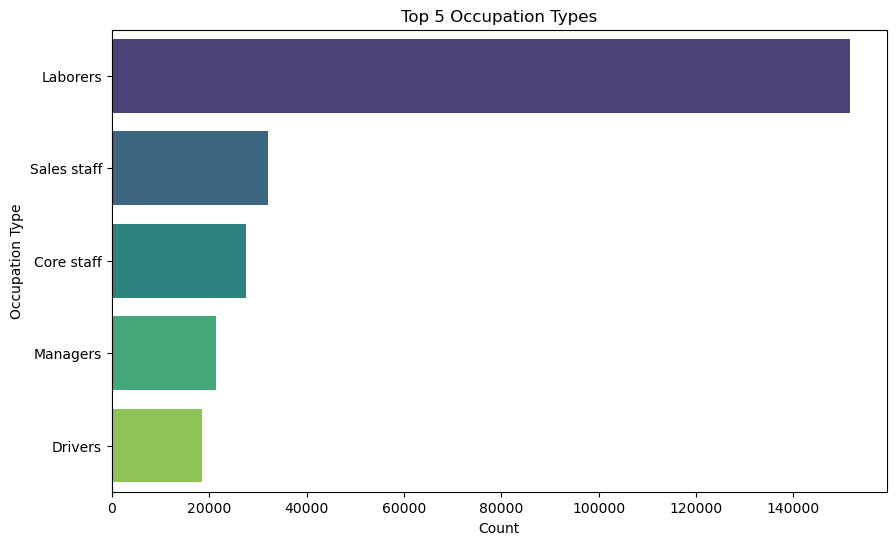

In [160]:
# A bar plot to find out top 5 occupation of clients
top_occupations = train_data['OCCUPATION_TYPE'].value_counts().head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_occupations.values, y=top_occupations.index, palette="viridis")
plt.xlabel("Count")
plt.ylabel("Occupation Type")
plt.title("Top 5 Occupation Types")
plt.show()

#### Most of the client who take loans are Laborers

### Occupation Type Annual Income distribution

Text(0, 0.5, 'Average Annual family income')

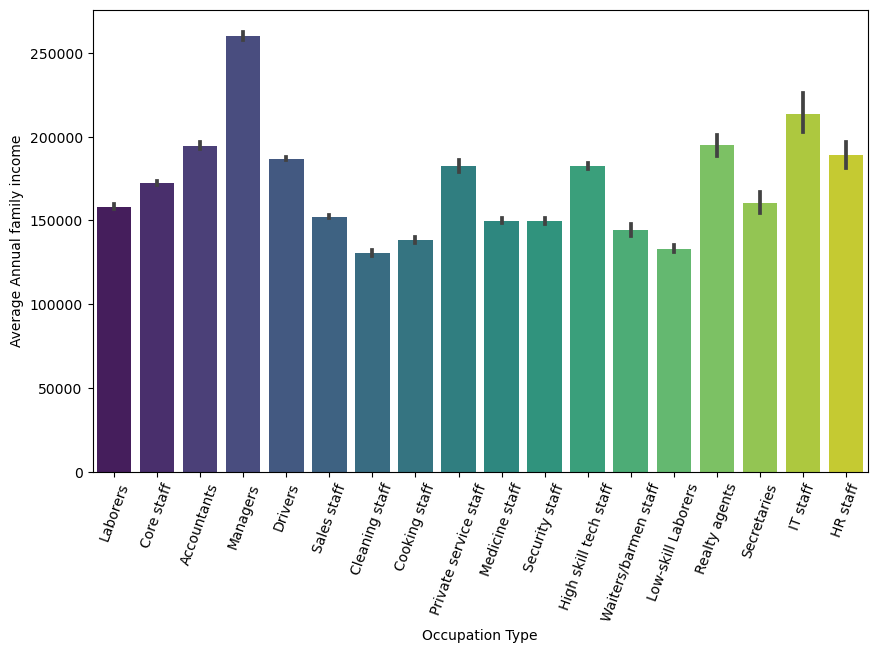

In [161]:
# A bar plot for determining the net annual income per organization type
plt.figure(figsize=(10, 6))
sns.barplot(x='OCCUPATION_TYPE',y='AMT_INCOME_TOTAL',palette="viridis",data=train_data)
plt.xticks(rotation=70)
plt.xlabel("Occupation Type")
plt.ylabel("Average Annual family income")

#### Borrowers who are managers tend to have the highest annual family income, whereas those employed as cleaning staff typically have the lowest annual family income.

### Does Occupation types effect loan default

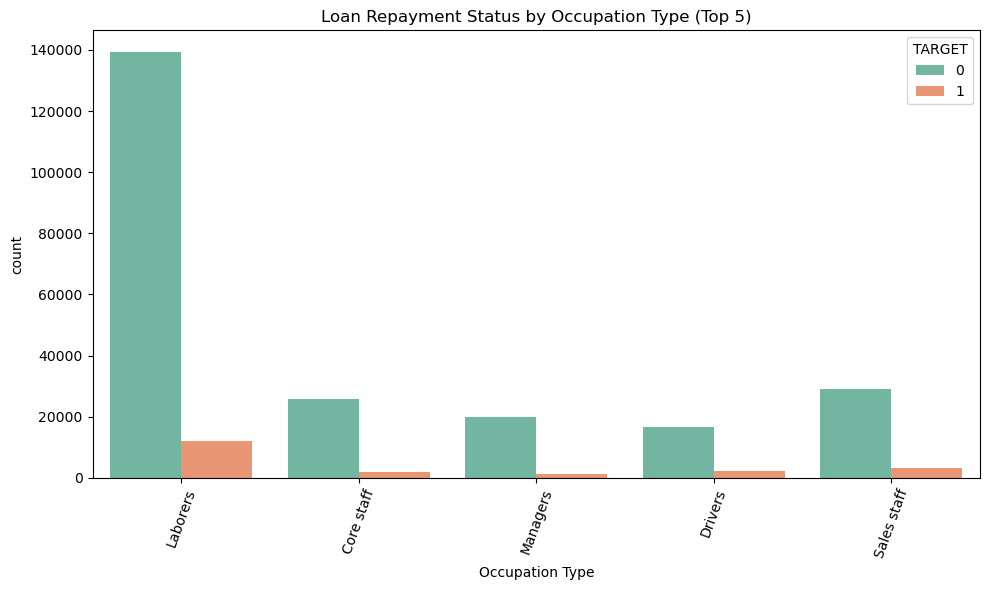

In [162]:
# Calculate the top 5 occupations by count
top_occupations = train_data['OCCUPATION_TYPE'].value_counts().head(5)

# Filter train_data to include only the top 5 occupations
filtered_data = train_data[train_data['OCCUPATION_TYPE'].isin(top_occupations.index)]

# Create the figure for the second plot only
plt.figure(figsize=(10, 6))
sns.countplot(x='OCCUPATION_TYPE', hue='TARGET', data=filtered_data, palette="Set2")
plt.xticks(rotation=70)
plt.xlabel("Occupation Type")
plt.title("Loan Repayment Status by Occupation Type (Top 5)")
plt.tight_layout()
plt.show()

# Showing only top5 to avoid cluttering of plot

#### Although laborers are the most clients they also are more likely to default.

### Having Children does it effect the loan default for the top Organization types

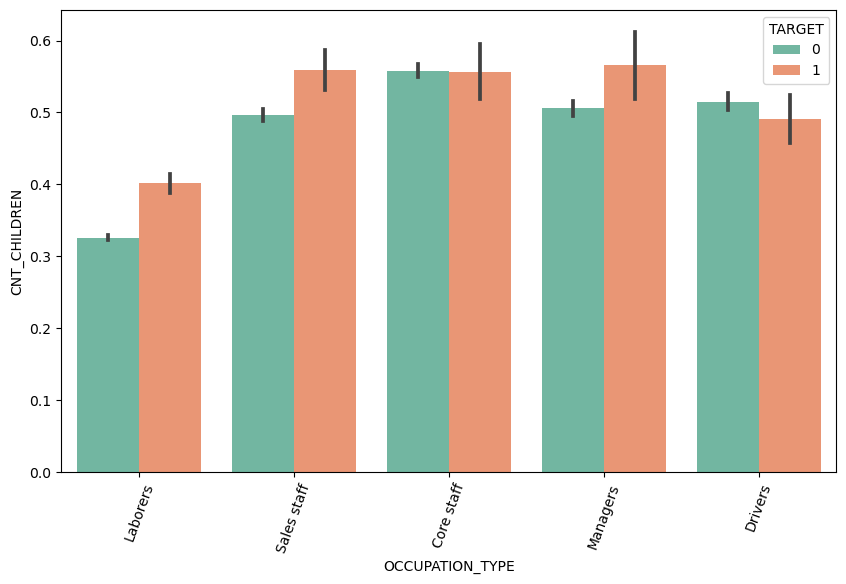

In [163]:
# Calculate the top 5 occupations with the highest average number of children in descending order
top_occupations = train_data.groupby('OCCUPATION_TYPE')['CNT_CHILDREN'].sum().sort_values(ascending=False).head(5).index

# Filter the DataFrame for the top 5 occupations
filtered_data = train_data[train_data['OCCUPATION_TYPE'].isin(top_occupations)]

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='OCCUPATION_TYPE', y='CNT_CHILDREN', hue='TARGET', palette="Set2",data=filtered_data, order=top_occupations)
plt.xticks(rotation=70)
plt.show()

#### Private service staff tend to have a higher number of children, which potentially contributes to their increased challenges in loan repayment.

In [164]:
# Finding out correlations
correlations = train_data.corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(10))
print('Most Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.063368
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64
Most Negative Correlations:
 EXT_SOURCE_2                 -0.160295
EXT_SOURCE_3                 -0.155892
EXT_SOURCE_1                 -0.098887
DAYS_EMPLOYED_OUTLIER        -0.045987
REGION_POPULATION_RELATIVE   -0.037227
AMT_CREDIT                   -0.030369
HOUR_APPR_PROCESS_START      -0.024166
FLAG_PHONE                   -0.023806
AMT_REQ_CREDIT_BUREAU_MON    -0.014794
AMT_REQ_CREDIT_BUREAU_QRT    -0.005833
Name: TARGET, dtype: float64


### Which Age is more likely to default (from correlation)

In [165]:
train_data['DAYS_BIRTH'].head()

0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
Name: DAYS_BIRTH, dtype: int64

In [166]:
# Converting it into a positive value because days cannot be negative
train_data['DAYS_BIRTH'] = abs(train_data['DAYS_BIRTH'])
test_data['DAYS_BIRTH'] = abs(test_data['DAYS_BIRTH'])

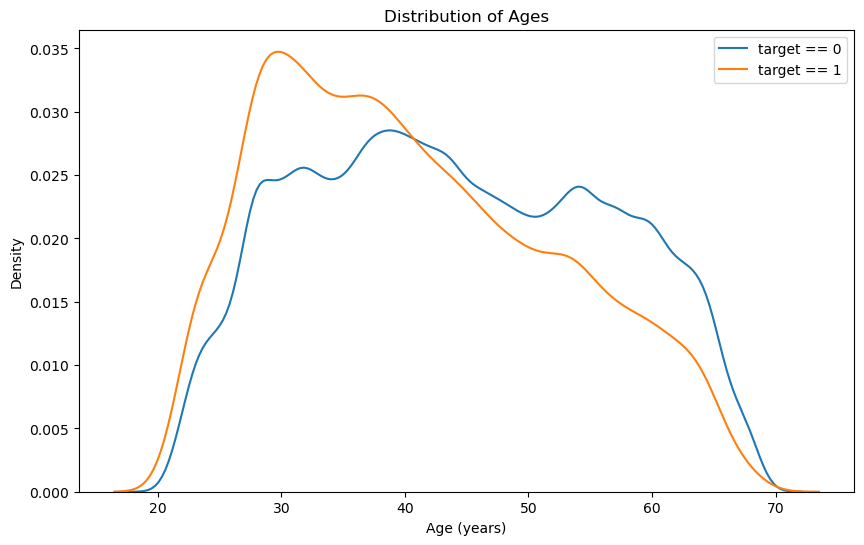

In [167]:
#Plotting a kde plot to know the distribution of Ages with respect to target
plt.figure(figsize = (10, 6))
sns.kdeplot(train_data.loc[train_data['TARGET'] == 0, 'DAYS_BIRTH']/365, label = 'target == 0')
sns.kdeplot(train_data.loc[train_data['TARGET'] == 1, 'DAYS_BIRTH']/365, label = 'target == 1')
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');
plt.legend()

####  The graph suggests that individuals in their 30s have a higher likelihood of loan repayment difficulties (target=1), with a decreasing trend as age increases.

### The impact of EXT_SOURCE 2 which has a high correlation with respect to  target

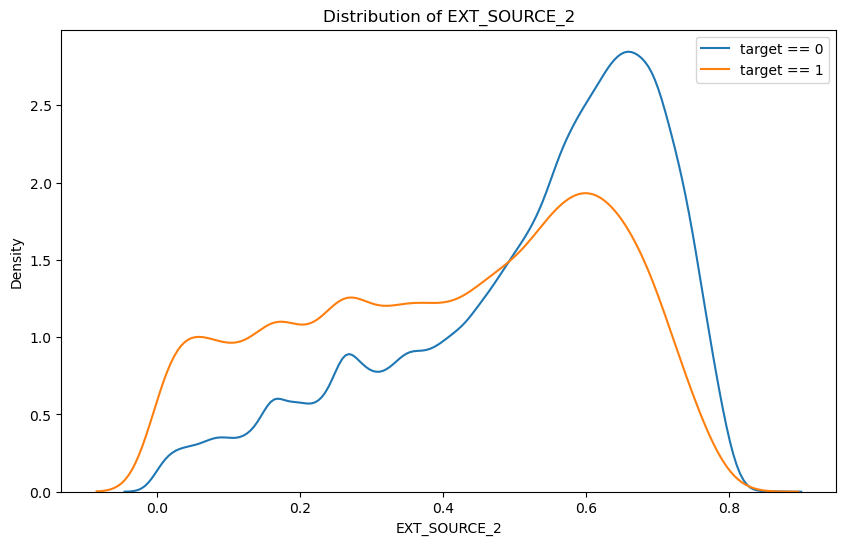

In [168]:
# Plotting a KDE plot to know the distribution of EXT_SOURCE_2 with respect to target
plt.figure(figsize = (10, 6))
sns.kdeplot(train_data.loc[train_data['TARGET'] == 0, 'EXT_SOURCE_2'], label = 'target == 0')
sns.kdeplot(train_data.loc[train_data['TARGET'] == 1, 'EXT_SOURCE_2'], label = 'target == 1')
plt.xlabel('EXT_SOURCE_2'); plt.ylabel('Density'); plt.title('Distribution of EXT_SOURCE_2');
plt.legend()

#### Higher the EXT_SOURCE_2 more likely to default

In [169]:
train_data['SK_ID_CURR']

0         100002
1         100003
2         100004
3         100006
4         100007
           ...  
307506    456251
307507    456252
307508    456253
307509    456254
307510    456255
Name: SK_ID_CURR, Length: 307511, dtype: int64

## 9. Balancing the Target variable

In [70]:
train_data['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [71]:
# Extracting target column for resampling
target = train_data["TARGET"].copy()
train_data.drop(["TARGET"], axis = 1).head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_OUTLIER
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,-637.0,-3648.0,-2120,1,1,0,1,1,0,Laborers,2,2,WEDNESDAY,10,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,False
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,-1188.0,-1186.0,-291,1,1,0,1,1,0,Core staff,1,1,MONDAY,11,0,0,0,0,School,0.311267,0.622246,0.535276,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,-225.0,-4260.0,-2531,1,1,1,1,1,0,Laborers,2,2,MONDAY,9,0,0,0,0,Government,0.505998,0.555912,0.729567,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,-3039.0,-9833.0,-2437,1,1,0,1,0,0,Laborers,2,2,WEDNESDAY,17,0,0,0,0,Business Entity Type 3,0.505998,0.650442,0.535276,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0,False
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,-3038.0,-4311.0,-3458,1,1,0,1,0,0,Core staff,2,2,THURSDAY,11,0,0,0,1,Religion,0.505998,0.322738,0.535276,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [72]:
under_sampler = RandomUnderSampler(random_state=0)
train_data, target_resampled = under_sampler.fit_resample(train_data,target)

In [73]:
train_data["TARGET"] = target_resampled

In [74]:
train_data['TARGET'].value_counts()

0    24825
1    24825
Name: TARGET, dtype: int64

In [75]:
train_data.shape

(49650, 48)

In [76]:
test_data.shape

(48744, 47)

## 8. Converting Categorical to Numerical variables

In [170]:
### Dealing with Categorical variables
list(train_data.select_dtypes('object'))

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [171]:
# Apply One Hot Encoding to convert object type to numerical type
train_data = pd.get_dummies(train_data)

In [172]:
# verifying whether the object variables are converted to numerical
list(train_data.select_dtypes('object'))

[]

In [173]:
# Same steps for test dataset 
list(test_data.select_dtypes('object'))

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [174]:
test_data = pd.get_dummies(test_data)

In [175]:
# verifying whether the object variables are converted to numerical
list(test_data.select_dtypes('object'))

[]

In [176]:
train_data.shape

(307511, 160)

In [177]:
test_data.shape

(48744, 156)

In [178]:
# Both train and test data set have additional features excluding Target column in test dataset. We have to align the datasets
target = train_data["TARGET"].copy()
train = train_data.drop(["TARGET"], axis = 1)

In [179]:
# Aligning train and test data excluding extra columns created by get dummies
train_data, test_data = train_data.align(test_data, join = "inner", axis = 1)

In [180]:
# Adding the target column back to the training dataset
train_data["TARGET"] = target

In [181]:
train_data.shape

(307511, 157)

In [182]:
test_data.shape

(48744, 156)

In [183]:
train_data.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_OUTLIER,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type

## 10. Normalizing the data

In [650]:
scaling = StandardScaler()

# To get only numerical columns
numerical_columns = train_data.select_dtypes(exclude=['object']).columns

#Excluding target column and however
numerical_columns = [col for col in numerical_columns if col != 'TARGET']

#Transfrom train
train_data[numerical_columns] = scaling.fit_transform(train_data[numerical_columns])

#Transform Test
test_data[numerical_columns] = scaling.transform(test_data[numerical_columns])

In [651]:
train_data['TARGET'].value_counts()

0    24825
1    24825
Name: TARGET, dtype: int64

## 11. Feature Importance

In [184]:
# Target
target = train_data['TARGET']
features = train_data.columns.drop('TARGET')

# Random Forest for feature importance
random_forest = RandomForestClassifier(n_estimators=100, random_state=50, verbose=1, n_jobs=-1)
random_forest.fit(train_data[features], target)
feature_importance = random_forest.feature_importances_

feature_data = pd.DataFrame({"feature": features, "importance": feature_importance})
feature_data = feature_data.sort_values(by="importance", ascending=False).reset_index(drop=True)
feature_data.head(10)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   21.2s finished


,feature,importance
0,EXT_SOURCE_2,0.068692
1,EXT_SOURCE_3,0.063023
2,DAYS_BIRTH,0.050157
3,DAYS_ID_PUBLISH,0.049665
4,DAYS_REGISTRATION,0.049137
5,SK_ID_CURR,0.047654
6,AMT_CREDIT,0.044376
7,DAYS_LAST_PHONE_CHANGE,0.044287
8,DAYS_EMPLOYED,0.043700
9,AMT_INCOME_TOTAL,0.037923


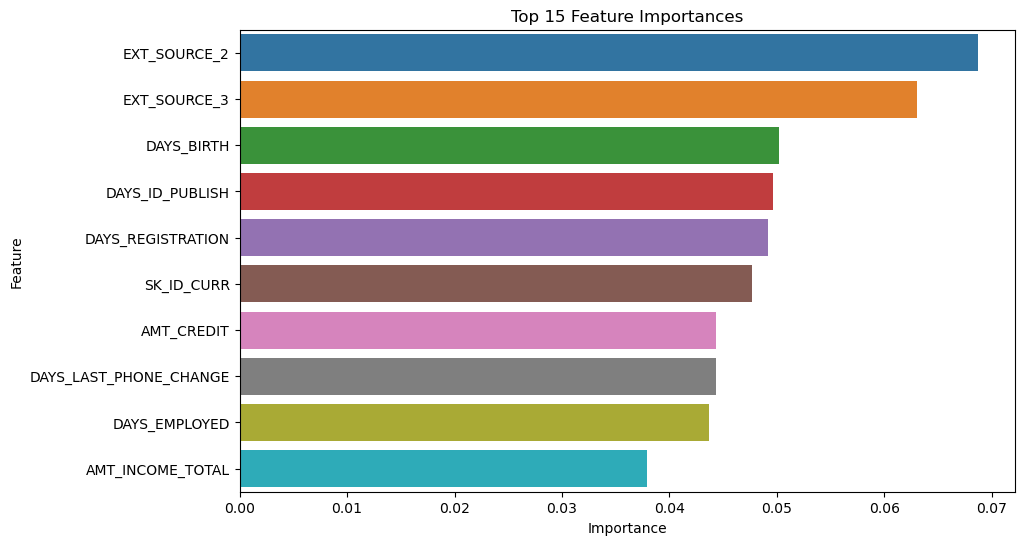

In [185]:
feature_data = feature_data.sort_values(by="importance", ascending=False)

# Select the top 15 features
top_features = feature_data.head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="importance", y="feature", data=top_features)
plt.title("Top 15 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

## 12. Modelling

In [189]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Assuming you have a dataset 'train_data' with features and a target column 'TARGET'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_data.drop('TARGET', axis=1), train_data['TARGET'], test_size=0.2, random_state=42)

# Define the XGBoost model with ROC as the evaluation metric
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',  # ROC-AUC as the evaluation metric
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    'gamma': 0,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'scale_pos_weight': 1,
    'nthread': 4,
    'random_state': 42,
    'class_weight': 'balanced'
}

# Convert data to DMatrix format for efficient training
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Train the XGBoost model
num_round = 100  # Number of boosting rounds (you can adjust this)
model = xgb.train(params, dtrain, num_round)

# Make predictions on the test set
y_pred = model.predict(dtest)

# Calculate the ROC-AUC score on the test set
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC Score: {roc_auc}')


C:\Users\Neil\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [17:21:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


ROC-AUC Score: 0.7537032271732766


In [191]:
test_data['SK_ID_CURR']

0        100001
1        100005
2        100013
3        100028
4        100038
          ...  
48739    456221
48740    456222
48741    456223
48742    456224
48743    456250
Name: SK_ID_CURR, Length: 48744, dtype: int64